# Ensemble Learning: Multi-Modal MRI Image Classification using Combined DenseNet-VGG19 Model

Summary: This code demonstrates a multi-modal MRI image classification approach using a combined DenseNet-VGG19 model. It first loads and preprocesses grayscale images, then constructs and trains individual DenseNet and VGG19 models. Finally, it combines these models into a unified architecture for improved classification performance(This might be challenging). The code also includes evaluation metrics such as confusion matrices and classification reports to assess model performance.







In [16]:
# importing the necessary libraries we are using for this project
import tensorflow as tf
import numpy as np
import os
import cv2 as cv 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random
import warnings

In [17]:
# function to load the images from the folder and process the MRI images
def load_images(img_folder):    
    img_data_array = [] # variable to get the processed imaged.    
    class_labels = [] # variable to get the different image classes.
    for directory in os.listdir(img_folder): # Looping over different folders
        for file in os.listdir(os.path.join(img_folder, directory)): # Looping over individual files inside of those folders
            image_path = os.path.join(img_folder, directory, file)
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE) # Converting images into Grayscales
            img = cv.resize(img, (224, 224), interpolation=cv.INTER_LANCZOS4) # Resizing images to 224x224 dimenstions using Lanczos4 interpolation method
            img = img.astype('float32') / 255.0 # Normalizing the images between the pixel values of 0 and 1
            img_data_array.append(img) # adding images to the array we defined earlier
            class_labels.append(directory) # adding class labels to the class label array we defined earlier
    return img_data_array, class_labels # returning both image and class label array so we can use it further in our project

In [18]:
# calling the load_images function we implemeted in the previous cell to process, load and get training images and training labels
train_images, train_labels = load_images('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Training')
# calling the load_images function we implemeted in the previous cell to process, load and get test images and test labels
test_images, test_labels = load_images('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Testing')

In [19]:
# Total number of images in training dataset
print("Size of the train part:", len(train_images))

Size of the train part: 5712


In [20]:
# Total number of images in test dataset
print("Size of the test part:", len(test_images))

Size of the test part: 1311


In [21]:
# combining training and test labels
combined_labels = train_labels + test_labels

In [22]:
# getting unique labels from the combined labels so we can finnaly get the unique classes ssociated with the dataset
unique_combined_labels = set(combined_labels)

In [23]:
# printing the unique labels so we can take a look at the different labels we will be working with in this project
print("Unique labels across both training and testing parts:", unique_combined_labels)

Unique labels across both training and testing parts: {'pituitary', 'glioma', 'meningioma', 'notumor'}


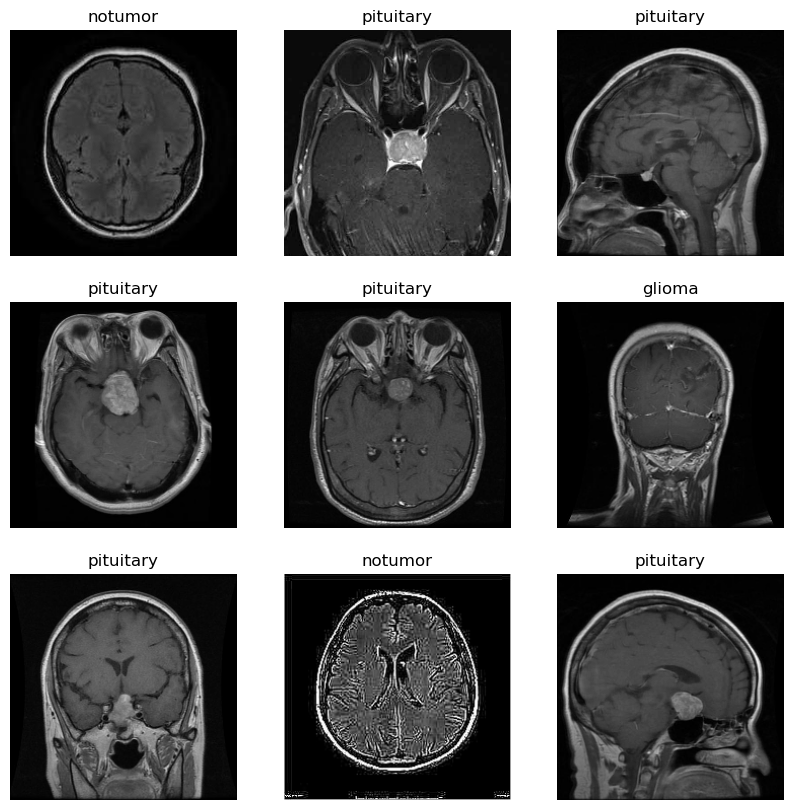

In [24]:
# Plot a 3x3 grid of randomly selected images from the training set
# Each image is displayed with its corresponding label
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    idx = random.randint(0, len(train_images) - 1)  
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(train_labels[idx])
    plt.axis("off")
plt.show()

In [25]:
# Calculate the count of each class label in the combined dataset
label_counts = {label: combined_labels.count(label) for label in set(combined_labels)}

In [26]:
# This just seperates the keys and values from this label_counts distionary into two different variables
labels, counts = zip(*label_counts.items())

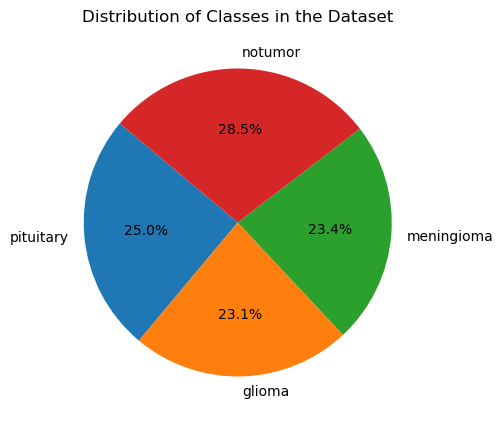

In [27]:
# Creating a Pie Chart to visualize the distribution to each class in the dataset
plt.figure(figsize=(6, 5))
# autopct='%1.1f%%' is used to format the percentages displayed in the chart
# startangle=140 and this is used to modigy how the pie chart looks
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in the Dataset')
plt.show()

In [28]:
# This function is quite similar to load_images folder because it loads the images from the folder path. However, this function also keeps track of the original image sizes for each image class
def load_images_and_sizes(img_folder):
    img_data_array = []
    class_labels = []
    # New Variable for getting the image sizes
    img_sizes_dict = {}  
    
    for directory in os.listdir(img_folder):
        if directory not in img_sizes_dict:
            img_sizes_dict[directory] = []
            
        for file in os.listdir(os.path.join(img_folder, directory)):
            image_path = os.path.join(img_folder, directory, file)
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            
            # Getting sizes/dimenstions of images and adding them to the img_sizes_dict variable
            img_sizes_dict[directory].append(img.shape)
            
            img = cv.resize(img, (224, 224), interpolation=cv.INTER_LANCZOS4)
            img = img.astype('float32') / 255.0
            img_data_array.append(img)
            class_labels.append(directory)
            
    return img_data_array, class_labels, img_sizes_dict # Returning Image Sizes along with images array and class labels

In [29]:
# calling the load_images_and_sizes function we implemeted in the previous cell to process, load and get training images, training labels and training datasset image sizes
train_images, train_labels, train_sizes = load_images_and_sizes('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Training')
# calling the load_images_and_sizes function we implemeted in the previous cell to process, load and get test images, test labels and test datasset image sizes
test_images, test_labels, test_sizes = load_images_and_sizes('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Testing')

In [30]:
# combining the image_sizes for both training and test sets
combined_image_sizes = {label: train_sizes.get(label, []) + test_sizes.get(label, [])
                        for label in set(train_labels + test_labels)}

In [31]:
# Looping through the combined_image_sizes array and printing the image dimenstions for both datasets
for label, sizes in combined_image_sizes.items():
    print(f"Class '{label}':")
    for size in sizes:
        print(f"  Image size: {size}")
    print()

Class 'pituitary':
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (512, 512)
  Image size: (474, 474)
  Image size: (400, 400)
  Image size: (681, 685)
  Image size: (202, 202)
  Image size: (1280, 1280)
  Image size: (442, 442)
  Image size: (512, 512)
  Image size: (502, 502)
  Image size: (378, 360)
  Image size: (903, 721)
  Image size: (1365, 1365)
  

In [32]:
# Getting the resized images in this array
resized_sizes = [img.shape for img in train_images + test_images]

In [33]:
# Printing the resized array to make sure they're all 224x224
print(f"All images resized to: {set(resized_sizes)}")  

All images resized to: {(224, 224)}


In [34]:
# function to count the occurrences of each image size per class
def count_image_sizes(sizes_dict):
    size_counts_per_class = {label: {} for label in sizes_dict.keys()}
    
    # Iterating through each class and counting the occurrences of each image size
    for label, sizes in sizes_dict.items():
        for size in sizes:
            if size in size_counts_per_class[label]:
                size_counts_per_class[label][size] += 1
            else:
                size_counts_per_class[label][size] = 1
    return size_counts_per_class # Returning the image size counts for each class

In [35]:
# getting the size count for training set images
train_size_counts = count_image_sizes(train_sizes)
# getting the size count for test set images
test_size_counts = count_image_sizes(test_sizes)

In [36]:
# Combining the size counts for training and test sets
combined_size_counts = {}
for label in set(train_labels + test_labels):
    combined_size_counts[label] = train_size_counts.get(label, {})
    for size, count in test_size_counts.get(label, {}).items():
        if size in combined_size_counts[label]:
            combined_size_counts[label][size] += count
        else:
            combined_size_counts[label][size] = count

In [37]:
# Converting the combined sizes into a list and assigning it into the labels variable
labels = list(combined_size_counts.keys())
# Size count for combines sets
size_counts = [sum(sizes.values()) for sizes in combined_size_counts.values()]

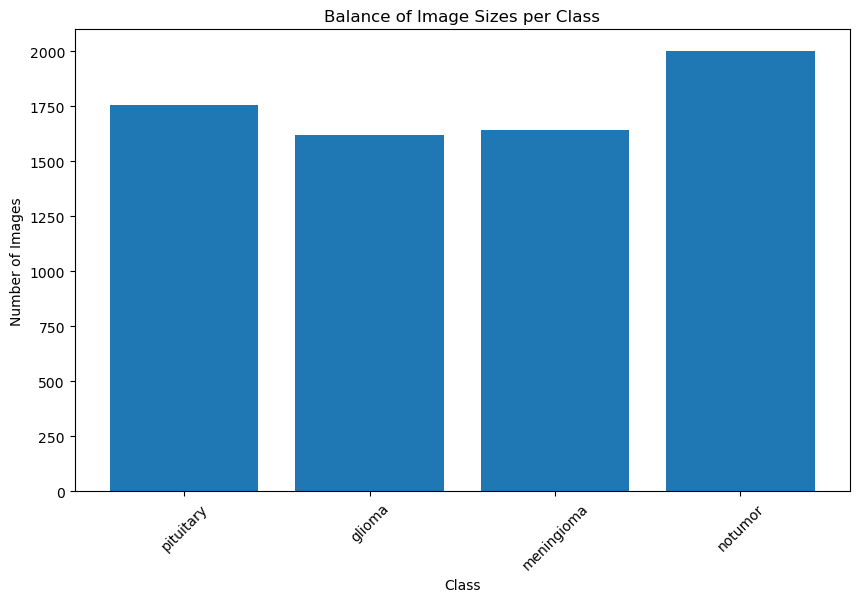

In [38]:
# Plot a bar chart to visualize the distribution of image sizes per class.
# Each bar represents a class, and its height indicates the total number of images of different sizes within that class.
plt.figure(figsize=(10, 6))
plt.bar(range(len(labels)), size_counts, tick_label=labels)
plt.title('Balance of Image Sizes per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# DeSNet Model

In [39]:
# Import necessary modules and functions from TensorFlow for building and training neural network models
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Concatenate
from tensorflow.keras.models import Model

In [40]:

# Define a dense block, which is a series of layers consisting of Batch Normalization, ReLU activation, and 3x3 convolutional layers
def dense_block(x, growth_rate, name):
    x1 = BatchNormalization(name=f'{name}_bn')(x) # Batch normalization layer to normalize the activations
    x1 = Activation('relu', name=f'{name}_relu')(x1) # Using relu as the activation function
    x1 = Conv2D(growth_rate, (3, 3), padding='same', name=f'{name}_conv')(x1) # Convolutional layer with a 3x3 kernel size
    x = Concatenate(name=f'{name}_concat')([x, x1]) # Concatenate the original input to allow feature reuse
    return x


In [41]:

# Define a transition layer, which reduces the number of channels in the feature maps and downsamples them spatially using 1x1 convolution followed by max pooling
def transition_layer(x, reduction, name):
    x = BatchNormalization(name=f'{name}_bn')(x) # Batch Normalization
    x = Activation('relu', name=f'{name}_relu')(x) # Using Relu again
    x = Conv2D(int(x.shape[-1] * reduction), (1, 1), padding='same', name=f'{name}_conv')(x) # Convolutional layer with a 1x1 kernel size
    x = MaxPooling2D((2, 2), strides=(2, 2), name=f'{name}_pool')(x) # Max pooling layer with a 2x2 pool size and strides to downsample the feature map
    return x


In [42]:

# Define a function to create a DenseNet model
def create_densenet(input_shape, num_classes, growth_rate=32, num_blocks=3, num_layers_per_block=4, reduction=0.5):
    # Define the input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='initial_conv')(inputs)
    x = BatchNormalization(name='initial_bn')(x)
    x = Activation('relu', name='initial_relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='initial_pool')(x)
    
    # Create dense blocks and transition layers
    for i in range(num_blocks):
        for j in range(num_layers_per_block):
            x = dense_block(x, growth_rate, name=f'block{i+1}_layer{j+1}') # Add a dense block
        if i != num_blocks - 1:
            x = transition_layer(x, reduction, name=f'block{i+1}_transition') # Add a transition layer between dense blocks

    # Final batch normalization and activation
    x = BatchNormalization(name='final_bn')(x)
    x = Activation('relu', name='final_relu')(x)
    
    # Global average pooling layer
    x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    
    # Output layer
    outputs = Dense(num_classes, activation='softmax', name='output')(x)
    
    # Create the model
    model = Model(inputs, outputs)
    
    return model


In [43]:
# Create an instance of the DenseNet model
densenet_model = create_densenet(input_shape=(224, 224, 1), num_classes=len(unique_combined_labels))

In [44]:
# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Print the summary of the model architecture
densenet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ initial_conv (Conv2D)         │ (None, 112, 112, 64)      │           3,200 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ initial_bn                    │ (None, 112, 112, 64)      │             256 │ initial_conv[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ initial_relu (Activation)     │ (None, 112, 112, 64)      │               0 │ initial_bn[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ initial_pool (MaxPooling2D)   │ (None, 56, 56, 64)        │               0 │ initial_relu[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer1_bn              │ (None, 56, 56, 64)        │             256 │ initial_pool[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer1_relu            │ (None, 56, 56, 64)        │               0 │ block1_layer1_bn[0][0]     │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer1_conv (Conv2D)   │ (None, 56, 56, 32)        │          18,464 │ block1_layer1_relu[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer1_concat          │ (None, 56, 56, 96)        │               0 │ initial_pool[0][0],        │
│ (Concatenate)                 │                           │                 │ block1_layer1_conv[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer2_bn              │ (None, 56, 56, 96)        │             384 │ block1_layer1_concat[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer2_relu            │ (None, 56, 56, 96)        │               0 │ block1_layer2_bn[0][0]     │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer2_conv (Conv2D)   │ (None, 56, 56, 32)        │          27,680 │ block1_layer2_relu[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer2_concat          │ (None, 56, 56, 128)       │               0 │ block1_layer1_concat[0][0… │
│ (Concatenate)                 │                           │                 │ block1_layer2_conv[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_layer3_bn              │ (None, 56, 56, 128)       │             51

 Total params: 537,044 (2.05 MB)

 Trainable params: 532,276 (2.03 MB)

 Non-trainable params: 4,768 (18.62 KB)

In [46]:
# Prepare data for training and testing

from tensorflow.keras.utils import to_categorical # Import necessary function for one-hot encoding of labels

all_images = np.array(train_images + test_images, dtype=np.float32) # Concatenate training and testing images into a single array
all_labels = train_labels + test_labels # Concatenate training and testing labels into a single array


In [47]:
unique_labels = list(set(all_labels)) # Get unique labels in the dataset
label_dict = {label: index for index, label in enumerate(unique_labels)} # Create a dictionary mapping each unique label to an index

In [48]:
encoded_labels = [label_dict[label] for label in all_labels] # Encode labels using the created dictionary

In [49]:
categorical_labels = to_categorical(encoded_labels, num_classes=len(unique_labels)) # Convert encoded labels to one-hot encoded format


In [50]:
# Split data into training and testing sets

X_train = all_images[:len(train_images)]
X_test = all_images[len(train_images):]
Y_train = categorical_labels[:len(train_images)]
Y_test = categorical_labels[len(train_images):]

In [51]:
# Train the model for 50 epochs
history = densenet_model.fit( X_train, Y_train, batch_size=100, epochs=50, validation_split=0.2,verbose=1)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.6097 - loss: 0.8927 - val_accuracy: 0.0000e+00 - val_loss: 2.3643
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.8495 - loss: 0.4470 - val_accuracy: 0.0000e+00 - val_loss: 6.7127
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.8860 - loss: 0.3381 - val_accuracy: 0.0000e+00 - val_loss: 8.3710
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.9119 - loss: 0.2549 - val_accuracy: 0.0262 - val_loss: 2.5521
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9292 - loss: 0.2076 - val_accuracy: 0.0612 - val_loss: 1.5869
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9267 - loss: 0.2094 - val_accuracy: 0.5827 - val_loss: 0.8182
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9313 - loss: 0.1853 - val_accuracy: 0.9379 - val_loss: 0.1689
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.9464 - loss: 0.1426 - val_accuracy

In [52]:
# Evaluate the model on the test data

test_loss, test_accuracy = densenet_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.9610 - loss: 0.1178
Test accuracy: 90.85%


In [53]:

# Generate confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix

densenet_predictions = densenet_model.predict(X_test)
densenet_predicted_classes = np.argmax(densenet_predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step


In [54]:

cm = confusion_matrix(true_classes, densenet_predicted_classes)

# Print confusion matrix

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[214  35  51   0]
 [  0 287  13   0]
 [  1   4 301   0]
 [  7   0   9 389]]


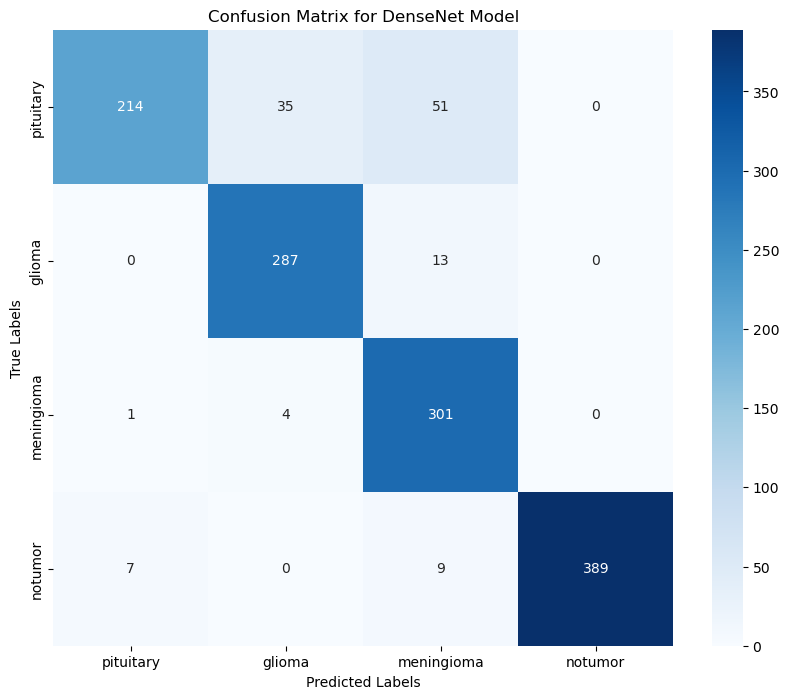

In [57]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DenseNet Model')
plt.show()

In [58]:
# Generate classification report

report = classification_report(true_classes, densenet_predicted_classes, target_names=unique_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   pituitary       0.96      0.71      0.82       300
      glioma       0.88      0.96      0.92       300
  meningioma       0.80      0.98      0.89       306
     notumor       1.00      0.96      0.98       405

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.92      0.91      0.91      1311



# VGG-19 Model

In [59]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten

In [60]:

# Function to load images from a specified folder
def load_images(img_folder):
    img_data_array = []
    class_labels = []
    # Loop through each subdirectory in the main directory
    for directory in os.listdir(img_folder):
        # Loop through each image file in the subdirectory
        for file in os.listdir(os.path.join(img_folder, directory)):
            # Read the image, resize, and preprocess it
            image_path = os.path.join(img_folder, directory, file)
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            img = cv.resize(img, (224, 224), interpolation=cv.INTER_LANCZOS4)
            img = np.stack((img,)*3, axis=-1)  
            img = img.astype('float32') / 255.0
            img_data_array.append(img)
            class_labels.append(directory)
    return np.array(img_data_array), class_labels


In [61]:

# Function to create VGG19 model
def create_vgg19_model(num_classes):
    # Load pre-trained VGG19 model without top layers
    base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    # Freeze all layers in the base model
    for layer in base_model.layers:
        layer.trainable = False
    # Add custom classification layers on top
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=x)


In [62]:

# Directories for training and testing data
train_data_dir = 'C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Training'
test_data_dir = 'C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Testing'


In [63]:

# Load training and testing images along with their labels
train_images, train_labels = load_images(train_data_dir)
test_images, test_labels = load_images(test_data_dir)


In [64]:

# Extract unique labels and encode them
unique_labels = list(set(train_labels + test_labels))
label_dict = {label: index for index, label in enumerate(unique_labels)}
train_labels_encoded = [label_dict[label] for label in train_labels]
test_labels_encoded = [label_dict[label] for label in test_labels]

# Convert labels to categorical format
Y_train = to_categorical(train_labels_encoded, num_classes=len(unique_labels))
Y_test = to_categorical(test_labels_encoded, num_classes=len(unique_labels))


In [65]:

# Create and compile VGG19 model
vgg19_model = create_vgg19_model(len(unique_labels))
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [66]:

# Train the model
history = vgg19_model.fit(train_images, Y_train, batch_size=32, epochs=10, validation_data=(test_images, Y_test), verbose=1)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.6765 - loss: 5.1066 - val_accuracy: 0.8444 - val_loss: 0.3967
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.8923 - loss: 0.2888 - val_accuracy: 0.8444 - val_loss: 0.4305
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9288 - loss: 0.1844 - val_accuracy: 0.8383 - val_loss: 0.4372
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9402 - loss: 0.1655 - val_accuracy: 0.9275 - val_loss: 0.1899
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.9553 - loss: 0.1267 - val_accuracy: 0.9130 - val_loss: 0.2483
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.9448 - loss: 0.1401 - val_accuracy: 0.9275 - val_loss: 0.2030
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9776 - loss: 0.0651 - val_accuracy: 0.9458 - val_loss: 0.1476
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9712 - loss: 0.0742 - val_accu

In [67]:

# Evaluate the model on test data
test_loss, test_accuracy = vgg19_model.evaluate(test_images, Y_test, verbose=1)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9448 - loss: 0.1944
Test accuracy: 97.10%


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [69]:

# Generate predictions and calculate confusion matrix
y_pred = vgg19_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step


In [70]:
cm = confusion_matrix(y_true, y_pred_classes)
clr = classification_report(y_true, y_pred_classes, target_names=unique_labels)

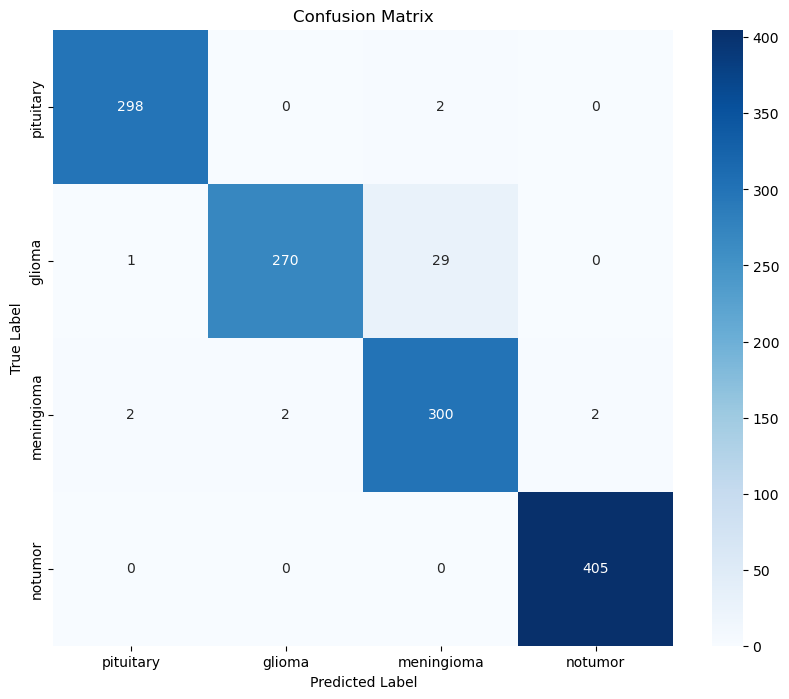

Classification Report:
               precision    recall  f1-score   support

   pituitary       0.99      0.99      0.99       300
      glioma       0.99      0.90      0.94       300
  meningioma       0.91      0.98      0.94       306
     notumor       1.00      1.00      1.00       405

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [71]:

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:\n', clr)


# Combined the Models

In [72]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import random

In [73]:
# Function to load images from a specified folder
def load_images(img_folder):
    # Initialize an empty list to store image data
    img_data_array = []
    # Initialize an empty list to store class labels
    class_labels = []
    # Iterate over each subdirectory in the image folder, each representing a class
    for directory in os.listdir(img_folder):
    # Iterate over each file in the directory
        for file in os.listdir(os.path.join(img_folder, directory)):
            image_path = os.path.join(img_folder, directory, file)
            img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
            # Resize the image to 224x224 pixels using Lanczos interpolation
            img = cv.resize(img, (224, 224), interpolation=cv.INTER_LANCZOS4)
            # Stack the grayscale image into 3 channels (imitate RGB)
            img = np.stack((img,)*3, axis=-1)  
            # Convert the image data to float32 and normalize it
            img = img.astype('float32') / 255.0
            img_data_array.append(img)
            class_labels.append(directory)
    # Convert the list of images to a numpy array and return it with the class labels
    return np.array(img_data_array), class_labels

In [74]:
def dense_block(x, growth_rate, name):
    # Normalize the feature maps (x) to improve training stability and performance.
    x1 = BatchNormalization(name=f'{name}_bn')(x)
    # Apply ReLU activation to introduce non-linearity, allowing the model to learn more complex patterns.
    x1 = Activation('relu', name=f'{name}_relu')(x1)
    # Apply a 3x3 convolution to the activated feature maps to expand the feature space by 'growth_rate'.
    x1 = Conv2D(growth_rate, (3, 3), padding='same', name=f'{name}_conv')(x1)
    # Concatenate the input feature maps with the new feature maps generated by the convolution.
    x = concatenate([x, x1], axis=-1, name=f'{name}_concat')
    return x

def transition_layer(x, reduction, name):
    # Normalize the feature maps to ensure consistent mean and variance.
    x = BatchNormalization(name=f'{name}_bn')(x)
    # Apply ReLU activation to help the model capture non-linearities in the data.
    x = Activation('relu', name=f'{name}_relu')(x)
    # Reduce the number of feature maps using a 1x1 convolution, multiplying the number of feature maps by 'reduction'.
    x = Conv2D(int(x.shape[-1] * reduction), (1, 1), padding='same', name=f'{name}_conv')(x)
    # Apply a 2x2 max pooling with stride 2 to reduce the spatial dimensions by half, enhancing feature extraction and reducing computation.
    x = MaxPooling2D((2, 2), strides=(2, 2), name=f'{name}_pool')(x)
    return x

def create_densenet(input_shape, num_classes, growth_rate=32, num_blocks=3, num_layers_per_block=4, reduction=0.5):
    # Define the input layer with the specified input shape for the model.
    inputs = Input(shape=input_shape)
    # Apply batch normalization following the initial convolution.
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='initial_conv')(inputs)
    x = BatchNormalization(name='initial_bn')(x)
    # Use ReLU activation after initial batch normalization.
    x = Activation('relu', name='initial_relu')(x)
    # Use a 3x3 max pooling layer with stride 2 to reduce dimensionality, aiding in feature abstraction.
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='initial_pool')(x)
    # Sequentially add dense blocks and transition layers.
    for i in range(num_blocks):
        for j in range(num_layers_per_block):
            x = dense_block(x, growth_rate, name=f'block{i+1}_layer{j+1}')
        if i != num_blocks - 1:
            x = transition_layer(x, reduction, name=f'block{i+1}_transition')
    # Apply final batch normalization after all dense and transition blocks.
    x = BatchNormalization(name='final_bn')(x)
    x = Activation('relu', name='final_relu')(x)
    x = GlobalAveragePooling2D(name='global_avg_pool')(x)
    outputs = Dense(num_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs, outputs)
    return model

In [75]:
def create_vgg19(input_shape, num_classes):
    # Load the VGG19 model pre-trained on ImageNet without the top layer (fully connected layers).
    base_model = VGG19(include_top=False, input_shape=input_shape, weights='imagenet')
    # Get the output of the last convolutional layer in the VGG19 model.
    x = base_model.output
    # Flatten the feature maps from the convolutional layers to prepare for the fully connected layers.
    x = Flatten(name='flatten')(x)
    # Add a fully connected (dense) layer with 4096 units and ReLU activation.
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(num_classes, activation='softmax', name='predictions')(x)
    # Create a new model that takes the input from the VGG19 model and outputs the new softmax layer.
    model = Model(inputs=base_model.input, outputs=x)
    return model

In [76]:
# Define the input layer with the specified input shape.
def create_combined_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    # Create an instance of the DenseNet model for the specified input shape and number of classes
    densenet = create_densenet((224, 224, 3), num_classes)
    # Create an instance of the VGG19 model for the specified input shape and number of classes
    vgg19 = create_vgg19((224, 224, 3), num_classes)
    # Pass the inputs through the DenseNet model to get its output
    output1 = densenet(inputs)
    # Pass the inputs through the VGG19 model to get its output
    output2 = vgg19(inputs)
    # Concatenate the outputs from DenseNet and VGG19 along the last dimension (channels)
    combined = concatenate([output1, output2], axis=-1, name='combine_dense_vgg')
    # Add a fully connected layer with 'num_classes' units and a softmax activation to classify the combined features
    outputs = Dense(num_classes, activation='softmax', name='final_output')(combined)
    # Create the model object linking inputs to the final outputs
    model = Model(inputs, outputs)
    return model

In [77]:
# Load training and testing images and labels from specified directories.
train_images, train_labels = load_images('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Training')
test_images, test_labels = load_images('C:/Users/Elyas_Irankhah/Special_Topics_Health_Medicine/Final Project/archive (1)/Testing')
# Create a set of unique labels from both training and testing labels.
unique_labels = list(set(train_labels + test_labels))
label_dict = {label: index for index, label in enumerate(unique_labels)}
encoded_labels = [label_dict[label] for label in train_labels + test_labels]
categorical_labels = to_categorical(encoded_labels, num_classes=len(unique_labels))

X_train = train_images[:len(train_images)]
X_test = train_images[len(train_images):]
Y_train = categorical_labels[:len(train_images)]
Y_test = categorical_labels[len(train_images):]
# Initialize and compile the combined model for the classification task.
combined_model = create_combined_model((224, 224, 3), len(unique_labels))
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
history = combined_model.fit(train_images, Y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1109s 8s/step - accuracy: 0.3951 - loss: 1.3591 - val_accuracy: 0.0000e+00 - val_loss: 1.4782
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1098s 8s/step - accuracy: 0.6012 - loss: 1.1096 - val_accuracy: 0.0000e+00 - val_loss: 1.7990
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1093s 8s/step - accuracy: 0.7855 - loss: 0.9606 - val_accuracy: 0.0000e+00 - val_loss: 1.9949
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1097s 8s/step - accuracy: 0.7890 - loss: 0.8552 - val_accuracy: 0.0000e+00 - val_loss: 2.0541
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1097s 8s/step - accuracy: 0.8176 - loss: 0.7604 - val_accuracy: 0.0000e+00 - val_loss: 2.0717
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1099s 8s/step - accuracy: 0.8266 - loss: 0.6893 - val_accuracy: 0.0000e+00 - val_loss: 2.1497
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1097s 8s/step - accuracy: 0.8355 - loss: 0.6257 - val_accuracy: 0.0000e+00 - val_loss: 2.6415
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1092s 8s/step - accura

In [79]:
# Evaluate the model on the test dataset. This returns the loss and the accuracy of the model
test_loss, test_accuracy = combined_model.evaluate(test_images, Y_test, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7487 - loss: 0.7511
Test accuracy: 67.58%


In [80]:
# Convert the list of test images into a numpy array with data type float32
X_test = np.array(test_images, dtype=np.float32) 
Y_test = to_categorical([label_dict[label] for label in test_labels], num_classes=len(unique_labels))  

In [81]:
# Use the combined model to make predictions on the test data
predictions = combined_model.predict(X_test)
# Find the index of the maximum value in each prediction row, which corresponds to the predicted class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step


In [82]:
# Calculate the confusion matrix using true labels and predicted labels.
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[112  25 162   1]
 [  0 207  93   0]
 [  6   4 262  34]
 [  5  12  83 305]]


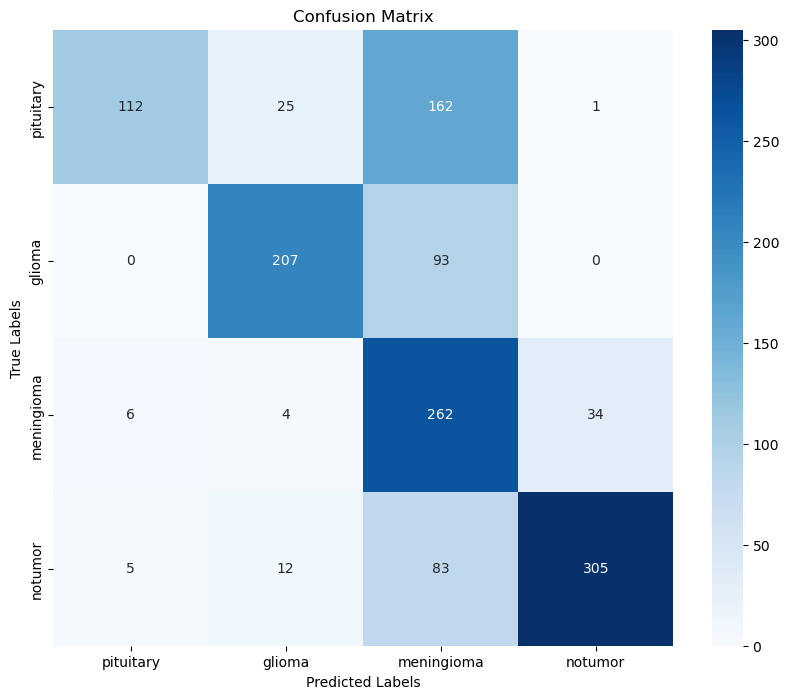

Classification Report:
              precision    recall  f1-score   support

   pituitary       0.91      0.37      0.53       300
      glioma       0.83      0.69      0.76       300
  meningioma       0.44      0.86      0.58       306
     notumor       0.90      0.75      0.82       405

    accuracy                           0.68      1311
   macro avg       0.77      0.67      0.67      1311
weighted avg       0.78      0.68      0.68      1311



In [83]:
# Create a figure with specified size
plt.figure(figsize=(10, 8))
# Generate a heatmap for the confusion matrix. Annotate each cell with the integer count, format as integer.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
# Set the label for the x-axis.
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Generate a classification report, which includes precision, recall, and F1-score for each class.
report = classification_report(true_classes, predicted_classes, target_names=unique_labels)
print("Classification Report:")
print(report)

# FINISH